# **Introduction**

MNIST ("Modified National Institute of Standards and Technology") is the de facto “Hello World” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

Objective is to correctly identify digits from a dataset of tens of thousands of handwritten images

# **Approach**

For this, we will be using Keras (with TensorFlow as our backend) as the main package to create a simple neural network to predict, as accurately as we can, digits from handwritten images. In particular, we will be calling the Functional Model API of Keras, and creating a 2-layered, 3-layered and 5-layered neural network.

Also, we will be experimenting with various optimizers: the plain vanilla Stochastic Gradient Descent optimizer and the Adam optimizer. However, there are many other parameters, such as training epochs which will we will not be experimenting with.

In addition, the choice of hidden layer units are completely arbitrary and may not be optimal. This is yet another parameter which we will not attempt to tinker with. Lastly, we introduce dropout, a form of regularisation, in our neural networks to prevent overfitting.

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
print("Printing the version of Tensorflow installed - ", tf.__version__)

Printing the version of Tensorflow installed -  1.13.1


**Importing the dataset**

In [2]:
mnist_data = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_data.load_data()

print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d, %d)"%(x_train.shape[1], x_train.shape[2]))
print("Number of training examples :", x_test.shape[0], "and each image is of shape (%d, %d)"%(x_test.shape[1], x_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


# **Plotting**

Printing the label for the first image : 5


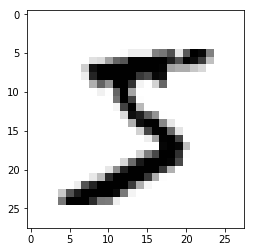

In [3]:
print("Printing the label for the first image :", y_train[0])
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

# **Data preprocessing and Data cleaning**

In [4]:
x_train.shape

(60000, 28, 28)

**Observation** - As you can see, the above dataset contains 3D array with each row containing 28x28 matrix. We will have to change this such that each row will contain 784(28\*28) columns.

In [5]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

print("The shape of Training data now becomes : ", x_train.shape)
print("The shape of Testing data now becomes  : ", x_test.shape)

The shape of Training data now becomes :  (60000, 784)
The shape of Testing data now becomes  :  (10000, 784)


In [6]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

**Observation** - We will have to normalize the data before training the MLP model.

There are two approaches for normalization-

1. Divide the entire dataset by 255.0 (Since in rgb 255 is the maximum value)

2. We can use the inbuilt normalization library of tensorflow - utils.normalize()

In [0]:
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)

In [8]:
# After normalizing
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# **One hot encoding**

In [9]:
print("Class label for the first image ", y_train[0])

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

print("Class label after one hot encoding : ", y_train[0])

Class label for the first image  5
Class label after one hot encoding :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# **MLP Architectures on dataset using Keras**

In [0]:
# Some paramaters to be predefined
n_epochs = 20
batchsize = 1024

output_dim = 10
input_dim = x_train.shape[1]

In [0]:
final_output = pd.DataFrame(columns=["#Layers", "Model", "Layer-Architecture", "Optimizer", "BN-Present", 
                                     "Dropout-Present",
                                     "Train-loss", "Test-loss", "Train-accuracy", "Test-Accuracy"])

In [0]:
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

## **2 Hidden Layers architecture**

### *2 ReLU hidden Layers (512-128) + ADAM*

Instructions for updating:
Colocations handled automatically by placer.
Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.9974 - acc: 0.7768 - val_loss: 0.3515 - val_acc: 0.9000
Epoch 2/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3060 - acc: 0.9112 - val_loss: 0.2601 - val_acc: 0.9253
Epoch 3/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2380 - acc: 0.9311 - val_loss: 0.2112 - val_acc: 0.9393
Epoch 4/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1939 - acc: 0.9434 - val_loss: 0.1797 - val_acc: 0.9492
Epoch 5/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1644 - acc: 0.9522 - val_loss: 0.1556 - val_acc: 0.9533
Epoch 6/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1415 - acc: 0.9592 - val_loss: 0.1402 - val_acc: 0.9

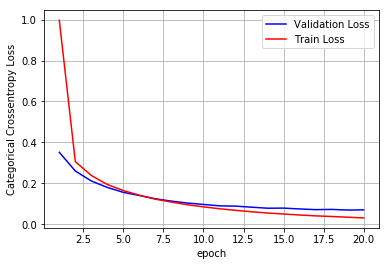

In [13]:
relumodel_2 = tf.keras.models.Sequential()
relumodel_2.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(input_dim, )))
relumodel_2.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
relumodel_2.add(tf.keras.layers.Dense(output_dim, activation=tf.nn.softmax))

relumodel_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model = relumodel_2.fit(x_train, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test, y_test))

print("***********************************************")
print("Printing the Model Summary")
print(relumodel_2.summary())
print("***********************************************")

score = relumodel_2.evaluate(x_test, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#Layers": 2, 
                                    "Model": "2-ReLU + Softmax", 
                                    "Layer-Architecture": "784 -> 512 -> 128 -> 10",
                                    "Optimizer": "ADAM", "BN-Present": False, 
                                    "Dropout-Present": False, 
                                    "Train-loss": '{:.5f}'.format(model.history["loss"][n_epochs-1]), 
                                    "Test-loss": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]), 
                                    "Train-accuracy": '{:.5f}'.format(model.history["acc"][n_epochs-1]), 
                                    "Test-Accuracy": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

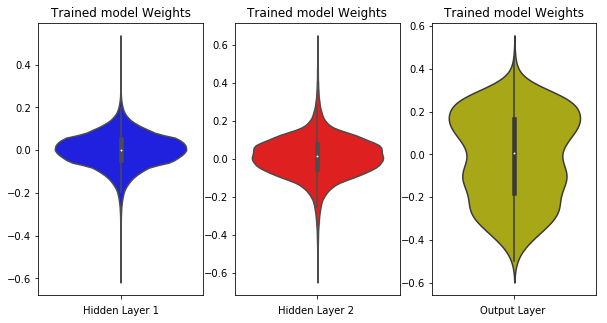

In [14]:
w_after = relumodel_2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### *2 ReLU hidden Layers (256-256) + ADAM*

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 45us/sample - loss: 1.1184 - acc: 0.7268 - val_loss: 0.3768 - val_acc: 0.8929
Epoch 2/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3240 - acc: 0.9049 - val_loss: 0.2743 - val_acc: 0.9183
Epoch 3/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2565 - acc: 0.9250 - val_loss: 0.2287 - val_acc: 0.9324
Epoch 4/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2157 - acc: 0.9383 - val_loss: 0.1954 - val_acc: 0.9418
Epoch 5/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1863 - acc: 0.9456 - val_loss: 0.1679 - val_acc: 0.9506
Epoch 6/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1610 - acc: 0.9529 - val_loss: 0.1536 - val_acc: 0.9540
Epoch 7/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1419 - acc: 0.9582 - val_loss: 0.

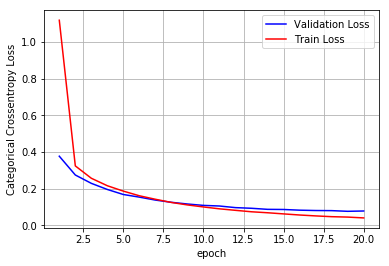

In [15]:
relumodel_2 = tf.keras.models.Sequential()
relumodel_2.add(tf.keras.layers.Dense(256, activation=tf.nn.relu, input_shape=(input_dim, )))
relumodel_2.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
relumodel_2.add(tf.keras.layers.Dense(output_dim, activation=tf.nn.softmax))

relumodel_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model = relumodel_2.fit(x_train, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test, y_test))

print("***********************************************")
print("Printing the Model Summary")
print(relumodel_2.summary())
print("***********************************************")

score = relumodel_2.evaluate(x_test, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#Layers": 2, 
                                    "Model": "2-ReLU + Softmax", 
                                    "Layer-Architecture": "784 -> 256 -> 256 -> 10",
                                    "Optimizer": "ADAM", "BN-Present": False, 
                                    "Dropout-Present": False, 
                                    "Train-loss": '{:.5f}'.format(model.history["loss"][n_epochs-1]), 
                                    "Test-loss": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]), 
                                    "Train-accuracy": '{:.5f}'.format(model.history["acc"][n_epochs-1]), 
                                    "Test-Accuracy": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

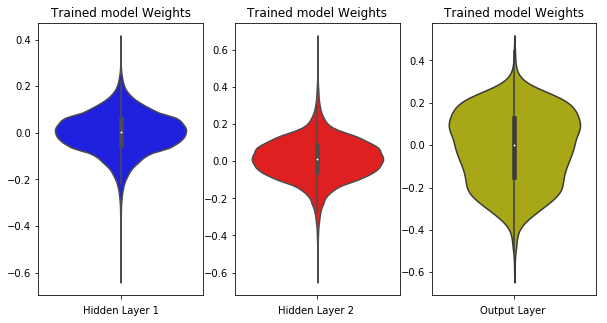

In [16]:
w_after = relumodel_2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### *2 ReLU hidden Layers (384-128) + ADAM*

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 49us/sample - loss: 1.0646 - acc: 0.7678 - val_loss: 0.3695 - val_acc: 0.8988
Epoch 2/20
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3195 - acc: 0.9073 - val_loss: 0.2722 - val_acc: 0.9203
Epoch 3/20
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2506 - acc: 0.9271 - val_loss: 0.2243 - val_acc: 0.9339
Epoch 4/20
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2089 - acc: 0.9398 - val_loss: 0.1871 - val_acc: 0.9460
Epoch 5/20
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1766 - acc: 0.9483 - val_loss: 0.1664 - val_acc: 0.9527
Epoch 6/20
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1520 - acc: 0.9552 - val_loss: 0.1488 - val_acc: 0.9554
Epoch 7/20
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1332 - acc: 0.9612 - val_loss: 0.

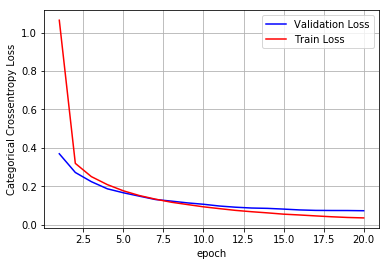

In [17]:
relumodel_2 = tf.keras.models.Sequential()
relumodel_2.add(tf.keras.layers.Dense(384, activation=tf.nn.relu, input_shape=(input_dim, )))
relumodel_2.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
relumodel_2.add(tf.keras.layers.Dense(output_dim, activation=tf.nn.softmax))

relumodel_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model = relumodel_2.fit(x_train, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test, y_test))

print("***********************************************")
print("Printing the Model Summary")
print(relumodel_2.summary())
print("***********************************************")

score = relumodel_2.evaluate(x_test, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#Layers": 2, 
                                    "Model": "2-ReLU + Softmax", 
                                    "Layer-Architecture": "784 -> 384 -> 128 -> 10",
                                    "Optimizer": "ADAM", "BN-Present": False, 
                                    "Dropout-Present": False, 
                                    "Train-loss": '{:.5f}'.format(model.history["loss"][n_epochs-1]), 
                                    "Test-loss": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]), 
                                    "Train-accuracy": '{:.5f}'.format(model.history["acc"][n_epochs-1]), 
                                    "Test-Accuracy": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

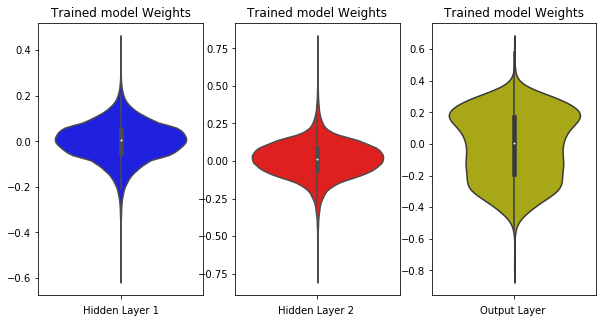

In [18]:
w_after = relumodel_2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### *2 ReLU hidden Layers (512-128) + BatchNormalization + Dropout + ADAM*

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.6757 - acc: 0.7988 - val_loss: 1.8734 - val_acc: 0.3371
Epoch 2/20
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2986 - acc: 0.9108 - val_loss: 1.7556 - val_acc: 0.2403
Epoch 3/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2363 - acc: 0.9294 - val_loss: 1.5945 - val_acc: 0.2704
Epoch 4/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1938 - acc: 0.9416 - val_loss: 1.3605 - val_acc: 0.4257
Epoch 5/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1655 - acc: 0.9500 - val_loss: 1.0498 - val_acc: 0.7379
Epoch 6/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1466 - acc: 0.9566 - val_loss: 0.6820 - val_acc: 0.9064
E

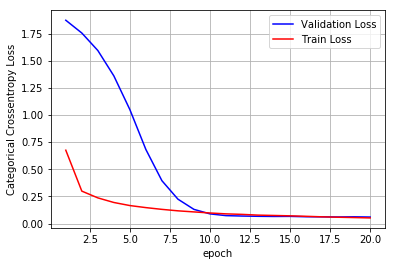

In [19]:
relumodel_2 = tf.keras.models.Sequential()
relumodel_2.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(input_dim, )))
relumodel_2.add(tf.keras.layers.BatchNormalization())
relumodel_2.add(tf.keras.layers.Dropout(0.5))
relumodel_2.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
relumodel_2.add(tf.keras.layers.BatchNormalization())
relumodel_2.add(tf.keras.layers.Dropout(0.5))
relumodel_2.add(tf.keras.layers.Dense(output_dim, activation=tf.nn.softmax))

relumodel_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model = relumodel_2.fit(x_train, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test, y_test))

print("***********************************************")
print("Printing the Model Summary")
print(relumodel_2.summary())
print("***********************************************")

score = relumodel_2.evaluate(x_test, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#Layers": 2, 
                                    "Model": "2-ReLU + Softmax", 
                                    "Layer-Architecture": "784 -> 512 -> 128 -> 10",
                                    "Optimizer": "ADAM", "BN-Present": True, 
                                    "Dropout-Present": True, 
                                    "Train-loss": '{:.5f}'.format(model.history["loss"][n_epochs-1]), 
                                    "Test-loss": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]), 
                                    "Train-accuracy": '{:.5f}'.format(model.history["acc"][n_epochs-1]), 
                                    "Test-Accuracy": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

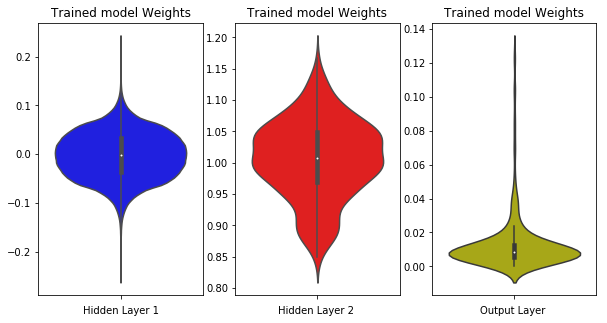

In [20]:
w_after = relumodel_2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### *2 ReLU hidden Layers (256-256) + BatchNormalization + Dropout + ADAM*

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.7771 - acc: 0.7660 - val_loss: 1.9486 - val_acc: 0.1833
Epoch 2/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3251 - acc: 0.9003 - val_loss: 1.8251 - val_acc: 0.1206
Epoch 3/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2563 - acc: 0.9229 - val_loss: 1.6905 - val_acc: 0.1385
Epoch 4/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2158 - acc: 0.9355 - val_loss: 1.4314 - val_acc: 0.2957
Epoch 5/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1894 - acc: 0.9422 - val_loss: 1.0783 - val_acc: 0.6259
Epoch 6/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1683 - acc: 0.9496 - val_loss: 0.7199 - val_acc: 0.8310
Epoch 7/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1531 - acc: 0.9531 - val_loss: 0.

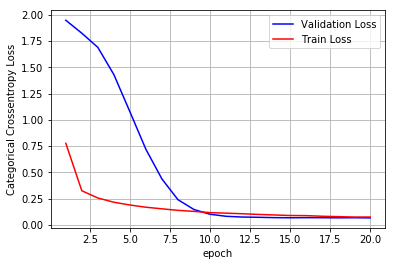

In [21]:
relumodel_2 = tf.keras.models.Sequential()
relumodel_2.add(tf.keras.layers.Dense(256, activation=tf.nn.relu, input_shape=(input_dim, )))
relumodel_2.add(tf.keras.layers.BatchNormalization())
relumodel_2.add(tf.keras.layers.Dropout(0.5))
relumodel_2.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
relumodel_2.add(tf.keras.layers.BatchNormalization())
relumodel_2.add(tf.keras.layers.Dropout(0.5))
relumodel_2.add(tf.keras.layers.Dense(output_dim, activation=tf.nn.softmax))

relumodel_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model = relumodel_2.fit(x_train, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test, y_test))

print("***********************************************")
print("Printing the Model Summary")
print(relumodel_2.summary())
print("***********************************************")

score = relumodel_2.evaluate(x_test, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#Layers": 2, 
                                    "Model": "2-ReLU + Softmax", 
                                    "Layer-Architecture": "784 -> 256 -> 256 -> 10",
                                    "Optimizer": "ADAM", "BN-Present": True, 
                                    "Dropout-Present": True, 
                                    "Train-loss": '{:.5f}'.format(model.history["loss"][n_epochs-1]), 
                                    "Test-loss": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]), 
                                    "Train-accuracy": '{:.5f}'.format(model.history["acc"][n_epochs-1]), 
                                    "Test-Accuracy": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

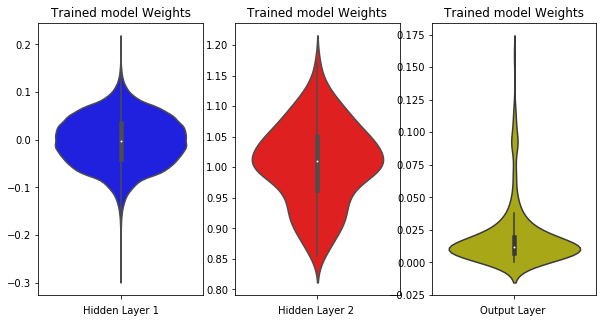

In [22]:
w_after = relumodel_2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### *2 ReLU hidden Layers (384-128) + BatchNormalization + Dropout + ADAM*

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 75us/sample - loss: 0.7401 - acc: 0.7775 - val_loss: 1.8800 - val_acc: 0.5990
Epoch 2/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3188 - acc: 0.9033 - val_loss: 1.6718 - val_acc: 0.6008
Epoch 3/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2496 - acc: 0.9271 - val_loss: 1.4658 - val_acc: 0.7006
Epoch 4/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2086 - acc: 0.9377 - val_loss: 1.2000 - val_acc: 0.8156
Epoch 5/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1793 - acc: 0.9449 - val_loss: 0.8920 - val_acc: 0.9021
Epoch 6/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1600 - acc: 0.9522 - val_loss: 0.5971 - val_acc: 0.9418
Epoch 7/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1432 - acc: 0.9571 - val_loss: 0.

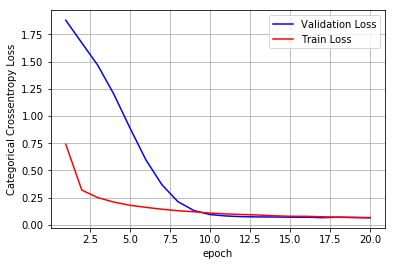

In [23]:
relumodel_2 = tf.keras.models.Sequential()
relumodel_2.add(tf.keras.layers.Dense(384, activation=tf.nn.relu, input_shape=(input_dim, )))
relumodel_2.add(tf.keras.layers.BatchNormalization())
relumodel_2.add(tf.keras.layers.Dropout(0.5))
relumodel_2.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
relumodel_2.add(tf.keras.layers.BatchNormalization())
relumodel_2.add(tf.keras.layers.Dropout(0.5))
relumodel_2.add(tf.keras.layers.Dense(output_dim, activation=tf.nn.softmax))

relumodel_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model = relumodel_2.fit(x_train, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test, y_test))

print("***********************************************")
print("Printing the Model Summary")
print(relumodel_2.summary())
print("***********************************************")

score = relumodel_2.evaluate(x_test, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#Layers": 2, 
                                    "Model": "2-ReLU + Softmax", 
                                    "Layer-Architecture": "784 -> 384 -> 128 -> 10",
                                    "Optimizer": "ADAM", "BN-Present": True, 
                                    "Dropout-Present": True, 
                                    "Train-loss": '{:.5f}'.format(model.history["loss"][n_epochs-1]), 
                                    "Test-loss": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]), 
                                    "Train-accuracy": '{:.5f}'.format(model.history["acc"][n_epochs-1]), 
                                    "Test-Accuracy": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

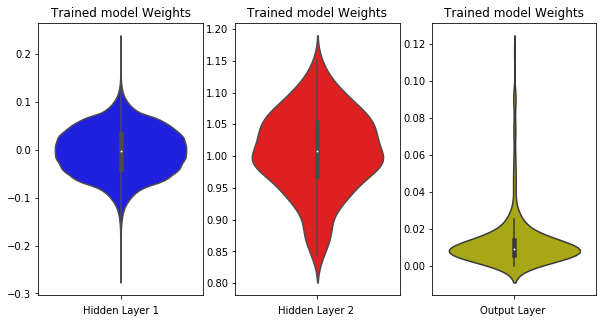

In [24]:
w_after = relumodel_2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## **3 Hidden Layers architecture**

In [0]:
final_output = final_output.append({"#Layers": "--", 
                                    "Model": "--", 
                                    "Layer-Architecture": "--",
                                    "Optimizer": "--", "BN-Present": "--", 
                                    "Dropout-Present": "--", 
                                    "Train-loss": "--", 
                                    "Test-loss": "--", 
                                    "Train-accuracy": "--", 
                                    "Test-Accuracy": "--"}, ignore_index=True)

### *3 ReLU hidden Layers (512-256-128) + ADAM*

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.8634 - acc: 0.7693 - val_loss: 0.2947 - val_acc: 0.9133
Epoch 2/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2597 - acc: 0.9237 - val_loss: 0.2218 - val_acc: 0.9331
Epoch 3/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1966 - acc: 0.9419 - val_loss: 0.1723 - val_acc: 0.9481
Epoch 4/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1584 - acc: 0.9532 - val_loss: 0.1499 - val_acc: 0.9547
Epoch 5/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1279 - acc: 0.9622 - val_loss: 0.1265 - val_acc: 0.9615
Epoch 6/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1064 - acc: 0.9686 - val_loss: 0.1099 - val_acc: 0.9656
Epoch 7/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0922 - acc: 0.9725 - val_loss: 0.

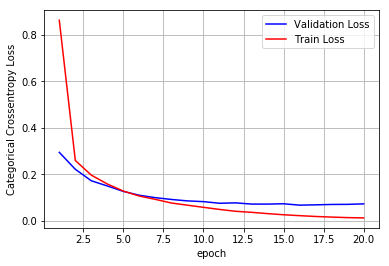

In [26]:
relumodel_3 = tf.keras.models.Sequential()
relumodel_3.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(input_dim, )))
relumodel_3.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
relumodel_3.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
relumodel_3.add(tf.keras.layers.Dense(output_dim, activation=tf.nn.softmax))

relumodel_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model = relumodel_3.fit(x_train, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test, y_test))

print("***********************************************")
print("Printing the Model Summary")
print(relumodel_3.summary())
print("***********************************************")

score = relumodel_3.evaluate(x_test, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#Layers": 3, 
                                    "Model": "3-ReLU + Softmax", 
                                    "Layer-Architecture": "784 -> 512 -> 256 -> 128 -> 10",
                                    "Optimizer": "ADAM", "BN-Present": False, 
                                    "Dropout-Present": False, 
                                    "Train-loss": '{:.5f}'.format(model.history["loss"][n_epochs-1]), 
                                    "Test-loss": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]), 
                                    "Train-accuracy": '{:.5f}'.format(model.history["acc"][n_epochs-1]), 
                                    "Test-Accuracy": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

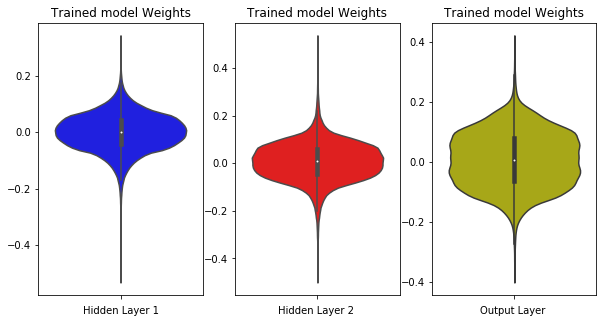

In [27]:
w_after = relumodel_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### *3 ReLU hidden Layers (512-128-64) + ADAM*

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.9820 - acc: 0.7609 - val_loss: 0.3465 - val_acc: 0.8991
Epoch 2/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2937 - acc: 0.9139 - val_loss: 0.2482 - val_acc: 0.9270
Epoch 3/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2216 - acc: 0.9358 - val_loss: 0.1922 - val_acc: 0.9430
Epoch 4/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1764 - acc: 0.9481 - val_loss: 0.1647 - val_acc: 0.9502
Epoch 5/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1438 - acc: 0.9576 - val_loss: 0.1383 - val_acc: 0.9591
Epoch 6/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1215 - acc: 0.9636 - val_loss: 0.1322 - val_acc: 0.9607
Epoch 7/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1036 - acc: 0.9696 - val_loss: 0.

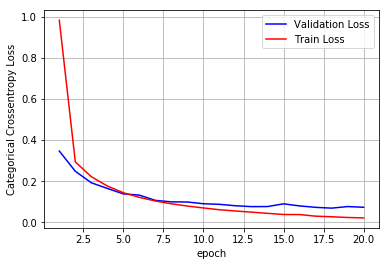

In [28]:
relumodel_3 = tf.keras.models.Sequential()
relumodel_3.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(input_dim, )))
relumodel_3.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
relumodel_3.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
relumodel_3.add(tf.keras.layers.Dense(output_dim, activation=tf.nn.softmax))

relumodel_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model = relumodel_3.fit(x_train, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test, y_test))

print("***********************************************")
print("Printing the Model Summary")
print(relumodel_3.summary())
print("***********************************************")

score = relumodel_3.evaluate(x_test, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#Layers": 3, 
                                    "Model": "3-ReLU + Softmax", 
                                    "Layer-Architecture": "784 -> 512 -> 128 -> 64 -> 10",
                                    "Optimizer": "ADAM", "BN-Present": False, 
                                    "Dropout-Present": False, 
                                    "Train-loss": '{:.5f}'.format(model.history["loss"][n_epochs-1]), 
                                    "Test-loss": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]), 
                                    "Train-accuracy": '{:.5f}'.format(model.history["acc"][n_epochs-1]), 
                                    "Test-Accuracy": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

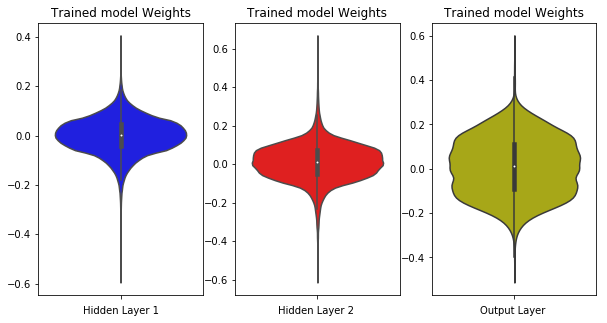

In [29]:
w_after = relumodel_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### *3 ReLU hidden Layers (384-256-128) + ADAM*

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.9044 - acc: 0.7855 - val_loss: 0.3027 - val_acc: 0.9101
Epoch 2/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2669 - acc: 0.9223 - val_loss: 0.2134 - val_acc: 0.9357
Epoch 3/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1952 - acc: 0.9424 - val_loss: 0.1727 - val_acc: 0.9489
Epoch 4/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1569 - acc: 0.9532 - val_loss: 0.1476 - val_acc: 0.9549
Epoch 5/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1287 - acc: 0.9616 - val_loss: 0.1300 - val_acc: 0.9606
Epoch 6/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1081 - acc: 0.9675 - val_loss: 0.1110 - val_acc: 0.9661
Epoch 7/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0918 - acc: 0.9719 - val_loss: 0.

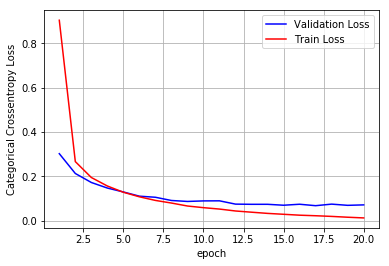

In [30]:
relumodel_3 = tf.keras.models.Sequential()
relumodel_3.add(tf.keras.layers.Dense(384, activation=tf.nn.relu, input_shape=(input_dim, )))
relumodel_3.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
relumodel_3.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
relumodel_3.add(tf.keras.layers.Dense(output_dim, activation=tf.nn.softmax))

relumodel_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model = relumodel_3.fit(x_train, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test, y_test))

print("***********************************************")
print("Printing the Model Summary")
print(relumodel_3.summary())
print("***********************************************")

score = relumodel_3.evaluate(x_test, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#Layers": 3, 
                                    "Model": "3-ReLU + Softmax", 
                                    "Layer-Architecture": "784 -> 384 -> 256 -> 128 -> 10",
                                    "Optimizer": "ADAM", "BN-Present": False, 
                                    "Dropout-Present": False, 
                                    "Train-loss": '{:.5f}'.format(model.history["loss"][n_epochs-1]), 
                                    "Test-loss": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]), 
                                    "Train-accuracy": '{:.5f}'.format(model.history["acc"][n_epochs-1]), 
                                    "Test-Accuracy": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

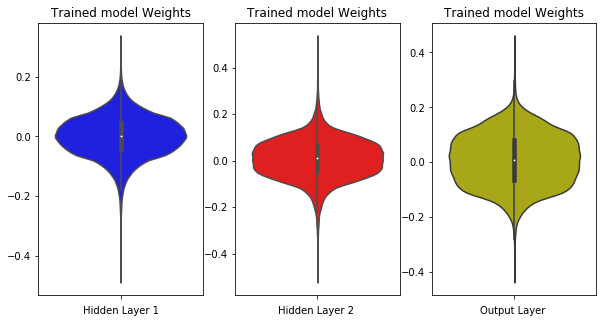

In [31]:
w_after = relumodel_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### *3 ReLU hidden Layers (512-256-128) + BatchNormalization + Dropout + ADAM*

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 109us/sample - loss: 0.6203 - acc: 0.8054 - val_loss: 1.9858 - val_acc: 0.0978
Epoch 2/20
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2467 - acc: 0.9247 - val_loss: 2.3146 - val_acc: 0.0974
Epoch 3/20
60000/60000 [==============================] - 6s 95us/sample - loss: 0.1933 - acc: 0.9406 - val_loss: 2.4727 - val_acc: 0.0979
Epoch 4/20
60000/60000 [==============================] - 6s 94us/sample - loss: 0.1586 - acc: 0.9510 - val_loss: 2.2506 - val_acc: 0.1620
Epoch 5/20
60000/60000 [==============================] - 6s 95us/sample - loss: 0.1383 - acc: 0.9575 - val_loss: 1.9394 - val_acc: 0.1974
Epoch 6/20
60000/60000 [==============================] - 6s 96us/sample - loss: 0.1181 - acc: 0.9625 - val_loss: 1.2399 - val_acc: 0.4169
Epoch 7/20
60000/60000 [==============================] - 6s 95us/sample - loss: 0.1099 - acc: 0.9666 - val_loss: 0

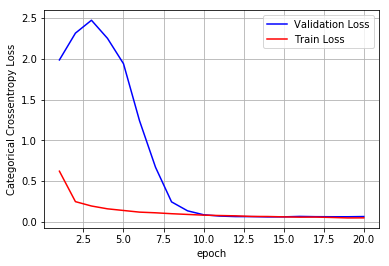

In [32]:
relumodel_3 = tf.keras.models.Sequential()
relumodel_3.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(input_dim, )))
relumodel_3.add(tf.keras.layers.BatchNormalization())
relumodel_3.add(tf.keras.layers.Dropout(0.5))
relumodel_3.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
relumodel_3.add(tf.keras.layers.BatchNormalization())
relumodel_3.add(tf.keras.layers.Dropout(0.5))
relumodel_3.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
relumodel_3.add(tf.keras.layers.Dense(output_dim, activation=tf.nn.softmax))

relumodel_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model = relumodel_3.fit(x_train, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test, y_test))

print("***********************************************")
print("Printing the Model Summary")
print(relumodel_3.summary())
print("***********************************************")

score = relumodel_3.evaluate(x_test, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#Layers": 3, 
                                    "Model": "3-ReLU + Softmax", 
                                    "Layer-Architecture": "784 -> 512 -> 256 -> 128 -> 10",
                                    "Optimizer": "ADAM", "BN-Present": True, 
                                    "Dropout-Present": True, 
                                    "Train-loss": '{:.5f}'.format(model.history["loss"][n_epochs-1]), 
                                    "Test-loss": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]), 
                                    "Train-accuracy": '{:.5f}'.format(model.history["acc"][n_epochs-1]), 
                                    "Test-Accuracy": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

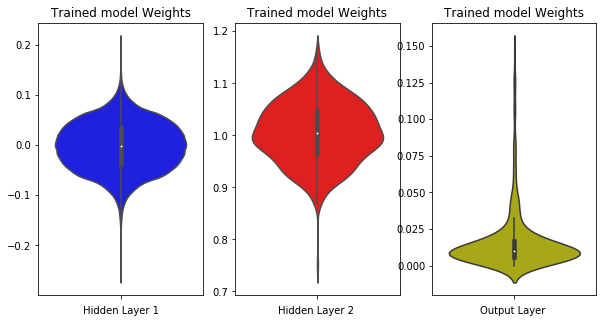

In [33]:
w_after = relumodel_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### *3 ReLU hidden Layers (512-128-64) + BatchNormalization + Dropout + ADAM*

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 92us/sample - loss: 0.7178 - acc: 0.7768 - val_loss: 1.9599 - val_acc: 0.1297
Epoch 2/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2933 - acc: 0.9117 - val_loss: 2.0435 - val_acc: 0.0982
Epoch 3/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2226 - acc: 0.9337 - val_loss: 1.9565 - val_acc: 0.0989
Epoch 4/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1820 - acc: 0.9456 - val_loss: 1.6727 - val_acc: 0.1564
Epoch 5/20
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1566 - acc: 0.9530 - val_loss: 1.3032 - val_acc: 0.3902
Epoch 6/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1382 - acc: 0.9586 - val_loss: 0.7529 - val_acc: 0.7091
Epoch 7/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1233 - acc: 0.9630 - val_loss: 0.

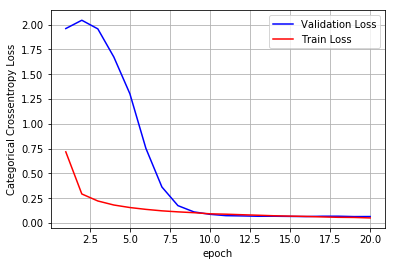

In [34]:
relumodel_3 = tf.keras.models.Sequential()
relumodel_3.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(input_dim, )))
relumodel_3.add(tf.keras.layers.BatchNormalization())
relumodel_3.add(tf.keras.layers.Dropout(0.5))
relumodel_3.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
relumodel_3.add(tf.keras.layers.BatchNormalization())
relumodel_3.add(tf.keras.layers.Dropout(0.5))
relumodel_3.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
relumodel_3.add(tf.keras.layers.Dense(output_dim, activation=tf.nn.softmax))

relumodel_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model = relumodel_3.fit(x_train, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test, y_test))

print("***********************************************")
print("Printing the Model Summary")
print(relumodel_3.summary())
print("***********************************************")

score = relumodel_3.evaluate(x_test, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#Layers": 3, 
                                    "Model": "3-ReLU + Softmax", 
                                    "Layer-Architecture": "784 -> 512 -> 128 -> 64 -> 10",
                                    "Optimizer": "ADAM", "BN-Present": True, 
                                    "Dropout-Present": True, 
                                    "Train-loss": '{:.5f}'.format(model.history["loss"][n_epochs-1]), 
                                    "Test-loss": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]), 
                                    "Train-accuracy": '{:.5f}'.format(model.history["acc"][n_epochs-1]), 
                                    "Test-Accuracy": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

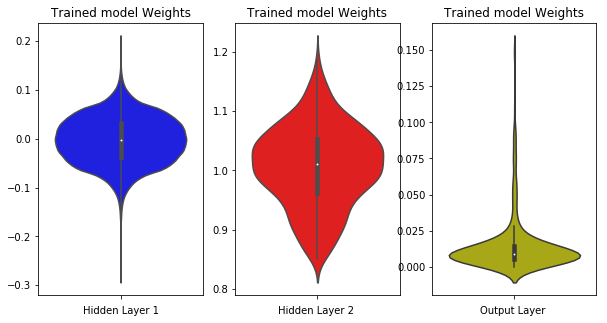

In [35]:
w_after = relumodel_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### *3 ReLU hidden Layers (384-256-128) + BatchNormalization + Dropout + ADAM*

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 92us/sample - loss: 0.6575 - acc: 0.7929 - val_loss: 2.0845 - val_acc: 0.0976
Epoch 2/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2646 - acc: 0.9195 - val_loss: 2.5004 - val_acc: 0.0974
Epoch 3/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2092 - acc: 0.9355 - val_loss: 2.5218 - val_acc: 0.0975
Epoch 4/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1732 - acc: 0.9473 - val_loss: 2.5314 - val_acc: 0.0994
Epoch 5/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1480 - acc: 0.9542 - val_loss: 2.0204 - val_acc: 0.2185
Epoch 6/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1317 - acc: 0.9594 - val_loss: 1.4259 - val_acc: 0.3795
Epoch 7/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1181 - acc: 0.9630 - val_loss: 0.

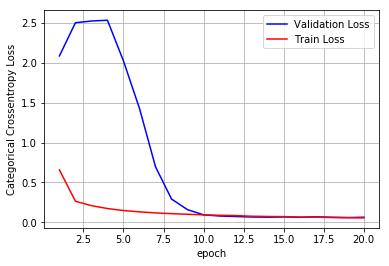

In [36]:
relumodel_3 = tf.keras.models.Sequential()
relumodel_3.add(tf.keras.layers.Dense(384, activation=tf.nn.relu, input_shape=(input_dim, )))
relumodel_3.add(tf.keras.layers.BatchNormalization())
relumodel_3.add(tf.keras.layers.Dropout(0.5))
relumodel_3.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
relumodel_3.add(tf.keras.layers.BatchNormalization())
relumodel_3.add(tf.keras.layers.Dropout(0.5))
relumodel_3.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
relumodel_3.add(tf.keras.layers.Dense(output_dim, activation=tf.nn.softmax))

relumodel_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model = relumodel_3.fit(x_train, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test, y_test))

print("***********************************************")
print("Printing the Model Summary")
print(relumodel_3.summary())
print("***********************************************")

score = relumodel_3.evaluate(x_test, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#Layers": 3, 
                                    "Model": "3-ReLU + Softmax", 
                                    "Layer-Architecture": "784 -> 384 -> 256 -> 128 -> 10",
                                    "Optimizer": "ADAM", "BN-Present": True, 
                                    "Dropout-Present": True, 
                                    "Train-loss": '{:.5f}'.format(model.history["loss"][n_epochs-1]), 
                                    "Test-loss": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]), 
                                    "Train-accuracy": '{:.5f}'.format(model.history["acc"][n_epochs-1]), 
                                    "Test-Accuracy": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

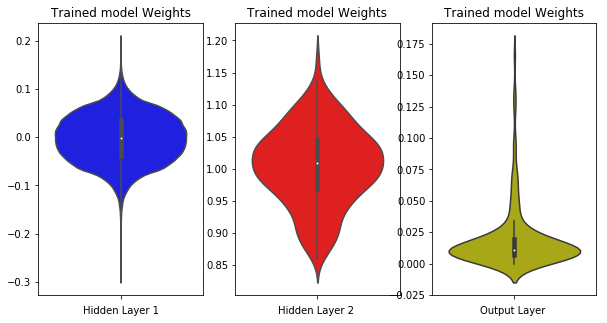

In [37]:
w_after = relumodel_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## **5 Hidden Layers architecture**

In [0]:
final_output = final_output.append({"#Layers": "--", 
                                    "Model": "--", 
                                    "Layer-Architecture": "--",
                                    "Optimizer": "--", "BN-Present": "--", 
                                    "Dropout-Present": "--", 
                                    "Train-loss": "--", 
                                    "Test-loss": "--", 
                                    "Train-accuracy": "--", 
                                    "Test-Accuracy": "--"}, ignore_index=True)

### *5 ReLU hidden Layers (512-384-256-128-64) + ADAM*

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 106us/sample - loss: 0.8376 - acc: 0.7474 - val_loss: 0.3146 - val_acc: 0.9047
Epoch 2/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2546 - acc: 0.9247 - val_loss: 0.2004 - val_acc: 0.9381
Epoch 3/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1716 - acc: 0.9494 - val_loss: 0.1515 - val_acc: 0.9550
Epoch 4/20
60000/60000 [==============================] - 6s 94us/sample - loss: 0.1279 - acc: 0.9617 - val_loss: 0.1282 - val_acc: 0.9596
Epoch 5/20
60000/60000 [==============================] - 6s 95us/sample - loss: 0.1027 - acc: 0.9691 - val_loss: 0.1003 - val_acc: 0.9683
Epoch 6/20
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0792 - acc: 0.9761 - val_loss: 0.0932 - val_acc: 0.9711
Epoch 7/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0665 - acc: 0.9795 - val_loss: 0

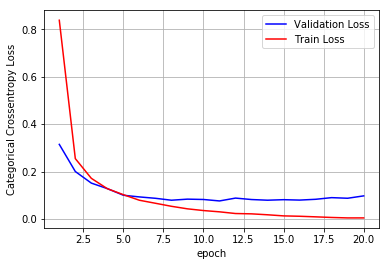

In [39]:
relumodel_5 = tf.keras.models.Sequential()
relumodel_5.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(input_dim, )))
relumodel_5.add(tf.keras.layers.Dense(384, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.Dense(output_dim, activation=tf.nn.softmax))

relumodel_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model = relumodel_5.fit(x_train, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test, y_test))

print("***********************************************")
print("Printing the Model Summary")
print(relumodel_5.summary())
print("***********************************************")

score = relumodel_5.evaluate(x_test, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#Layers": 5, 
                                    "Model": "5-ReLU + Softmax", 
                                    "Layer-Architecture": "784 -> 512 -> 384 -> 256 -> 128 -> 64 -> 10",
                                    "Optimizer": "ADAM", "BN-Present": False, 
                                    "Dropout-Present": False, 
                                    "Train-loss": '{:.5f}'.format(model.history["loss"][n_epochs-1]), 
                                    "Test-loss": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]), 
                                    "Train-accuracy": '{:.5f}'.format(model.history["acc"][n_epochs-1]), 
                                    "Test-Accuracy": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

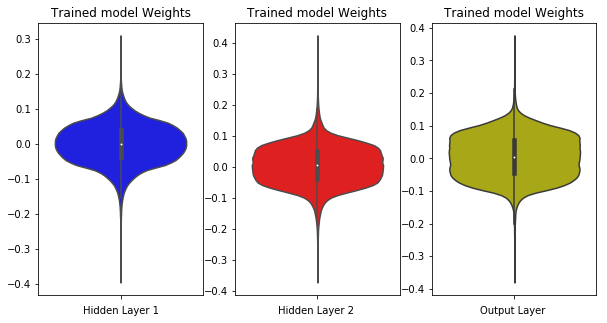

In [40]:
w_after = relumodel_5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### *5 ReLU hidden Layers (512-256-128-64-32) + ADAM*

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.9865 - acc: 0.7222 - val_loss: 0.3746 - val_acc: 0.8934
Epoch 2/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3030 - acc: 0.9122 - val_loss: 0.2393 - val_acc: 0.9280
Epoch 3/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2113 - acc: 0.9388 - val_loss: 0.1898 - val_acc: 0.9431
Epoch 4/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1631 - acc: 0.9519 - val_loss: 0.1514 - val_acc: 0.9548
Epoch 5/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1315 - acc: 0.9614 - val_loss: 0.1302 - val_acc: 0.9616
Epoch 6/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1066 - acc: 0.9682 - val_loss: 0.1140 - val_acc: 0.9642
Epoch 7/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0913 - acc: 0.9722 - val_loss: 0.

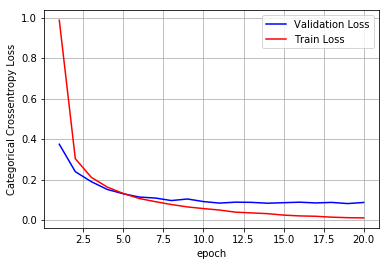

In [41]:
relumodel_5 = tf.keras.models.Sequential()
relumodel_5.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(input_dim, )))
relumodel_5.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.Dense(output_dim, activation=tf.nn.softmax))

relumodel_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model = relumodel_5.fit(x_train, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test, y_test))

print("***********************************************")
print("Printing the Model Summary")
print(relumodel_5.summary())
print("***********************************************")

score = relumodel_5.evaluate(x_test, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#Layers": 5, 
                                    "Model": "5-ReLU + Softmax", 
                                    "Layer-Architecture": "784 -> 512 -> 256 -> 128 -> 64 -> 32 -> 10",
                                    "Optimizer": "ADAM", "BN-Present": False, 
                                    "Dropout-Present": False, 
                                    "Train-loss": '{:.5f}'.format(model.history["loss"][n_epochs-1]), 
                                    "Test-loss": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]), 
                                    "Train-accuracy": '{:.5f}'.format(model.history["acc"][n_epochs-1]), 
                                    "Test-Accuracy": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

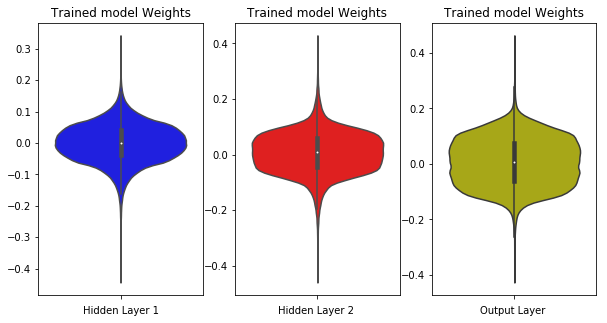

In [42]:
w_after = relumodel_5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### *5 ReLU hidden Layers (512-128-64-32-16) + ADAM*

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 74us/sample - loss: 1.4770 - acc: 0.5357 - val_loss: 0.7409 - val_acc: 0.7723
Epoch 2/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4721 - acc: 0.8718 - val_loss: 0.3171 - val_acc: 0.9142
Epoch 3/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2684 - acc: 0.9276 - val_loss: 0.2203 - val_acc: 0.9381
Epoch 4/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1965 - acc: 0.9452 - val_loss: 0.1864 - val_acc: 0.9453
Epoch 5/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1565 - acc: 0.9559 - val_loss: 0.1476 - val_acc: 0.9586
Epoch 6/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1301 - acc: 0.9627 - val_loss: 0.1297 - val_acc: 0.9622
Epoch 7/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1091 - acc: 0.9683 - val_loss: 0.

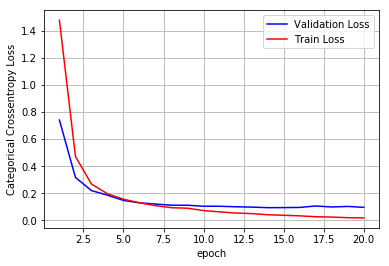

In [43]:
relumodel_5 = tf.keras.models.Sequential()
relumodel_5.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(input_dim, )))
relumodel_5.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.Dense(output_dim, activation=tf.nn.softmax))

relumodel_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model = relumodel_5.fit(x_train, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test, y_test))

print("***********************************************")
print("Printing the Model Summary")
print(relumodel_5.summary())
print("***********************************************")

score = relumodel_5.evaluate(x_test, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#Layers": 5, 
                                    "Model": "5-ReLU + Softmax", 
                                    "Layer-Architecture": "784 -> 512 -> 128 -> 64 -> 32 -> 16 -> 10",
                                    "Optimizer": "ADAM", "BN-Present": False, 
                                    "Dropout-Present": False, 
                                    "Train-loss": '{:.5f}'.format(model.history["loss"][n_epochs-1]), 
                                    "Test-loss": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]), 
                                    "Train-accuracy": '{:.5f}'.format(model.history["acc"][n_epochs-1]), 
                                    "Test-Accuracy": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

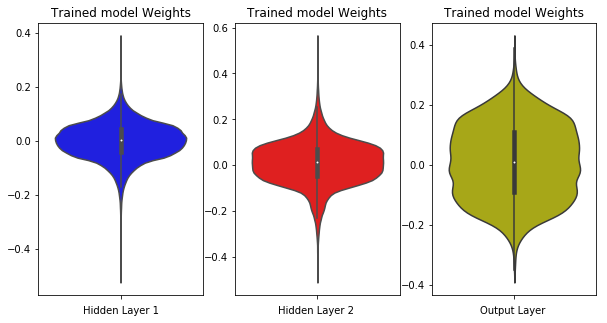

In [44]:
w_after = relumodel_5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### *5 ReLU hidden Layers (512-384-256-128-64) + BatchNormalization + Dropout + ADAM*

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 154us/sample - loss: 1.1776 - acc: 0.6162 - val_loss: 2.1850 - val_acc: 0.1435
Epoch 2/20
60000/60000 [==============================] - 8s 128us/sample - loss: 0.4080 - acc: 0.8788 - val_loss: 2.9801 - val_acc: 0.0974
Epoch 3/20
60000/60000 [==============================] - 8s 129us/sample - loss: 0.3010 - acc: 0.9135 - val_loss: 2.9817 - val_acc: 0.0980
Epoch 4/20
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2378 - acc: 0.9312 - val_loss: 2.8179 - val_acc: 0.1386
Epoch 5/20
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2035 - acc: 0.9415 - val_loss: 1.9801 - val_acc: 0.3267
Epoch 6/20
60000/60000 [==============================] - 8s 129us/sample - loss: 0.1769 - acc: 0.9487 - val_loss: 1.3237 - val_acc: 0.5080
Epoch 7/20
60000/60000 [==============================] - 8s 128us/sample - loss: 0.1589 - acc: 0.9538 - val_l

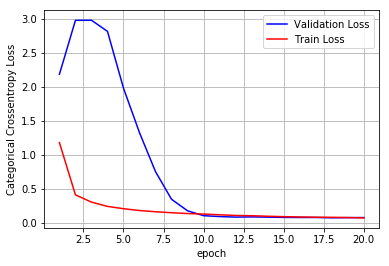

In [45]:
relumodel_5 = tf.keras.models.Sequential()
relumodel_5.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(input_dim, )))
relumodel_5.add(tf.keras.layers.BatchNormalization())
relumodel_5.add(tf.keras.layers.Dropout(0.5))
relumodel_5.add(tf.keras.layers.Dense(384, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.BatchNormalization())
relumodel_5.add(tf.keras.layers.Dropout(0.5))
relumodel_5.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.BatchNormalization())
relumodel_5.add(tf.keras.layers.Dropout(0.5))
relumodel_5.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.BatchNormalization())
relumodel_5.add(tf.keras.layers.Dropout(0.5))
relumodel_5.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.Dense(output_dim, activation=tf.nn.softmax))

relumodel_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model = relumodel_5.fit(x_train, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test, y_test))

print("***********************************************")
print("Printing the Model Summary")
print(relumodel_5.summary())
print("***********************************************")

score = relumodel_5.evaluate(x_test, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#Layers": 5, 
                                    "Model": "5-ReLU + Softmax", 
                                    "Layer-Architecture": "784 -> 512 -> 384 -> 256 -> 128 -> 64 -> 10",
                                    "Optimizer": "ADAM", "BN-Present": True, 
                                    "Dropout-Present": True, 
                                    "Train-loss": '{:.5f}'.format(model.history["loss"][n_epochs-1]), 
                                    "Test-loss": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]), 
                                    "Train-accuracy": '{:.5f}'.format(model.history["acc"][n_epochs-1]), 
                                    "Test-Accuracy": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

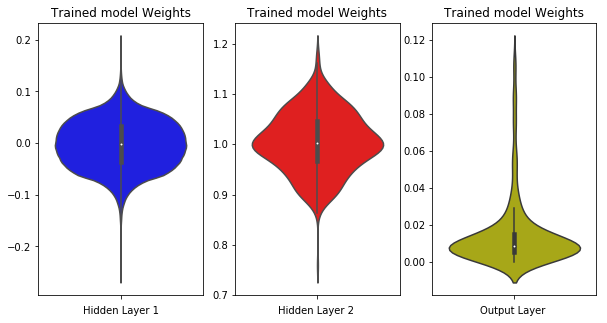

In [46]:
w_after = relumodel_5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### *5 ReLU hidden Layers (512-256-128-64-32) + BatchNormalization + Dropout + ADAM*

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 127us/sample - loss: 1.5776 - acc: 0.4854 - val_loss: 2.2071 - val_acc: 0.3203
Epoch 2/20
60000/60000 [==============================] - 6s 102us/sample - loss: 0.6154 - acc: 0.8227 - val_loss: 2.5244 - val_acc: 0.1348
Epoch 3/20
60000/60000 [==============================] - 6s 101us/sample - loss: 0.4099 - acc: 0.8871 - val_loss: 2.6993 - val_acc: 0.1823
Epoch 4/20
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3159 - acc: 0.9140 - val_loss: 2.4828 - val_acc: 0.2420
Epoch 5/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2600 - acc: 0.9298 - val_loss: 2.1246 - val_acc: 0.2918
Epoch 6/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2246 - acc: 0.9401 - val_loss: 1.2837 - val_acc: 0.5370
Epoch 7/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2021 - acc: 0.9465 - val_l

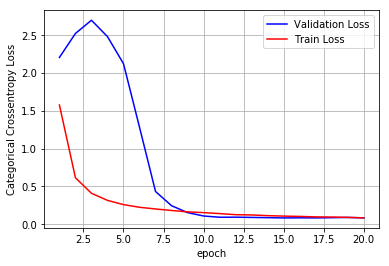

In [47]:
relumodel_5 = tf.keras.models.Sequential()
relumodel_5.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(input_dim, )))
relumodel_5.add(tf.keras.layers.BatchNormalization())
relumodel_5.add(tf.keras.layers.Dropout(0.5))
relumodel_5.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.BatchNormalization())
relumodel_5.add(tf.keras.layers.Dropout(0.5))
relumodel_5.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.BatchNormalization())
relumodel_5.add(tf.keras.layers.Dropout(0.5))
relumodel_5.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.BatchNormalization())
relumodel_5.add(tf.keras.layers.Dropout(0.5))
relumodel_5.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.Dense(output_dim, activation=tf.nn.softmax))

relumodel_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model = relumodel_5.fit(x_train, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test, y_test))

print("***********************************************")
print("Printing the Model Summary")
print(relumodel_5.summary())
print("***********************************************")

score = relumodel_5.evaluate(x_test, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#Layers": 5, 
                                    "Model": "5-ReLU + Softmax", 
                                    "Layer-Architecture": "784 -> 512 -> 256 -> 128 -> 64 -> 32 -> 10",
                                    "Optimizer": "ADAM", "BN-Present": True, 
                                    "Dropout-Present": True, 
                                    "Train-loss": '{:.5f}'.format(model.history["loss"][n_epochs-1]), 
                                    "Test-loss": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]), 
                                    "Train-accuracy": '{:.5f}'.format(model.history["acc"][n_epochs-1]), 
                                    "Test-Accuracy": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

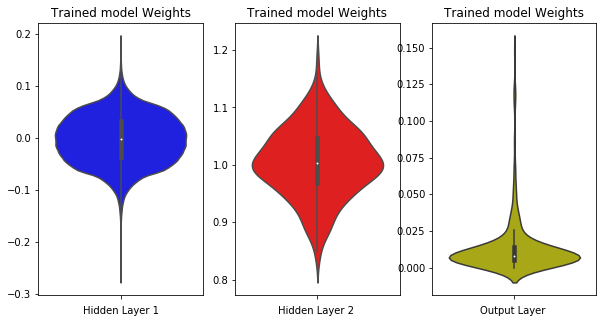

In [48]:
w_after = relumodel_5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### *5 ReLU hidden Layers (512-128-64-32-16) + BatchNormalization + Dropout + ADAM*

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 111us/sample - loss: 1.8243 - acc: 0.3702 - val_loss: 2.1310 - val_acc: 0.2047
Epoch 2/20
60000/60000 [==============================] - 5s 84us/sample - loss: 1.0923 - acc: 0.6401 - val_loss: 2.3769 - val_acc: 0.1413
Epoch 3/20
60000/60000 [==============================] - 5s 84us/sample - loss: 0.7828 - acc: 0.7556 - val_loss: 2.3591 - val_acc: 0.1599
Epoch 4/20
60000/60000 [==============================] - 5s 84us/sample - loss: 0.5977 - acc: 0.8222 - val_loss: 1.9045 - val_acc: 0.1981
Epoch 5/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4813 - acc: 0.8649 - val_loss: 1.1301 - val_acc: 0.5712
Epoch 6/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3978 - acc: 0.8934 - val_loss: 0.5505 - val_acc: 0.8466
Epoch 7/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3391 - acc: 0.9116 - val_loss: 0

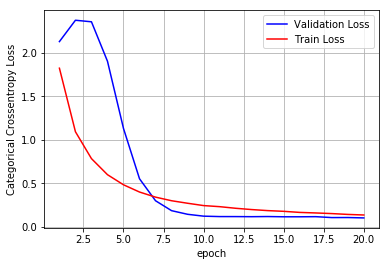

In [49]:
relumodel_5 = tf.keras.models.Sequential()
relumodel_5.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(input_dim, )))
relumodel_5.add(tf.keras.layers.BatchNormalization())
relumodel_5.add(tf.keras.layers.Dropout(0.5))
relumodel_5.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.BatchNormalization())
relumodel_5.add(tf.keras.layers.Dropout(0.5))
relumodel_5.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.BatchNormalization())
relumodel_5.add(tf.keras.layers.Dropout(0.5))
relumodel_5.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.BatchNormalization())
relumodel_5.add(tf.keras.layers.Dropout(0.5))
relumodel_5.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))
relumodel_5.add(tf.keras.layers.Dense(output_dim, activation=tf.nn.softmax))

relumodel_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model = relumodel_5.fit(x_train, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test, y_test))

print("***********************************************")
print("Printing the Model Summary")
print(relumodel_5.summary())
print("***********************************************")

score = relumodel_5.evaluate(x_test, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#Layers": 5, 
                                    "Model": "5-ReLU + Softmax", 
                                    "Layer-Architecture": "784 -> 512 -> 128 -> 64 -> 32 -> 16 -> 10",
                                    "Optimizer": "ADAM", "BN-Present": True, 
                                    "Dropout-Present": True, 
                                    "Train-loss": '{:.5f}'.format(model.history["loss"][n_epochs-1]), 
                                    "Test-loss": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]), 
                                    "Train-accuracy": '{:.5f}'.format(model.history["acc"][n_epochs-1]), 
                                    "Test-Accuracy": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

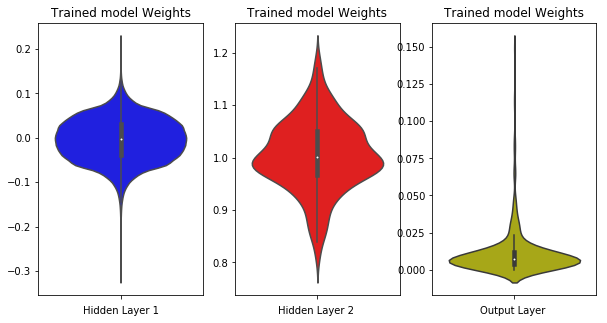

In [50]:
w_after = relumodel_5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# **Conclusion**

***Steps Summary -***

* The dataset that is taken for analysing MLP techniques is MNIST which contains data about the handwritten images. Bascially, we have to classify the handwritten numbers from the image to numeric.
* A number of architectures were deployed - ***2 hidden layers, 3 hidden layers, 5 hidden layers***.
* In this, we specifically took Rectified Linear Unit (**ReLU**) as our default activation function with 'AdaM' optimizer.
* For each of the architecture, we tried BatchNormalization(**BN**) and **Dropout** ( With dropout rate to 0.5 ) to see whether our model performs better or not.

In [51]:
print("The below output summarizes the number of architecture performances that were deployed on MNIST Dataset")
print("*******************************************************************************************************")
final_output

The below output summarizes the number of architecture performances that were deployed on MNIST Dataset
*******************************************************************************************************


,#Layers,Model,Layer-Architecture,Optimizer,BN-Present,Dropout-Present,Train-loss,Test-loss,Train-accuracy,Test-Accuracy
0,2,2-ReLU + Softmax,784 -> 512 -> 128 -> 10,ADAM,False,False,0.03062,0.06986,0.99197,0.97840
1,2,2-ReLU + Softmax,784 -> 256 -> 256 -> 10,ADAM,False,False,0.04022,0.07797,0.98873,0.97630
2,2,2-ReLU + Softmax,784 -> 384 -> 128 -> 10,ADAM,False,False,0.03553,0.07293,0.99040,0.97670
3,2,2-ReLU + Softmax,784 -> 512 -> 128 -> 10,ADAM,True,True,0.05164,0.05973,0.98323,0.98230
4,2,2-ReLU + Softmax,784 -> 256 -> 256 -> 10,ADAM,True,True,0.07511,0.06643,0.97567,0.98020
5,2,2-ReLU + Softmax,784 -> 384 -> 128 -> 10,ADAM,True,True,0.06306,0.06616,0.98013,0.98030
6,--,--,--,--,--,--,--,--,--,--
7,3,3-ReLU + Softmax,784 -> 512 -> 256 -> 128 -> 10,ADAM,False,False,0.01240,0.07288,0.99708,0.97820
8,3,3-ReLU + Softmax,784 -> 512 -> 128 -> 64 -> 10,ADAM,False,False,0.02145,0.07323,0.99483,0.98000
9,3,3-ReLU + Softmax,784 -> 384 -> 256 -> 128 -> 10,ADAM,False,False,0.01295,0.07172,0.99713,0.97860


***Output Representation*** - 
* **Layers** -> The Number of Hidden Layers that were used.
* **Model** -> The Models that were used.
* **Layer Architecture** -> Number of neurons present in each hidden layer
* **Optimizer** -> The Type of Optimizer that was used.
* **BN-Present** -> Batch Normalization was used or not
* **Dropout-Present** -> Dropout rate was applied to the model or not



***Output Conclusion*** -

By looking at the above table,
We can conclude that after applying batch normalization and dropout, the loss(train & test) becomes significantly less different. Also, the accuracy for train as well test does not differs a lot.
